In [1]:
from ast import arg

import matplotlib.cbook as cbook
import random
import copy
import os

from analysis_utils import *
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

import statistics

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import math

In [2]:
methodes = ['degree', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
           'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'random', 'neiNodesNum', 
            'new_neiNodeSum_1_HNCsize', ]
heatMatSize = {'unanimity':{1:(50,30), 2:(22,30), 9:(27,30), 5:(31,30), 11:(50,30), 12:(20,30), 19:(50,30)}}

heatMat = {1:{}, 2:{}, 9:{}, 5:{}, 11:{}, 12:{}, 19:{}}
nodeNumDic = {1: 1718, 2: 1290, 3: 420, 4: 580, 5: 1104, 
              6: 294, 7: 282, 8: 143, 9: 979, 10: 339, 
              11: 591, 12: 217, 13: 76, 14: 242, 15: 403, 
              16: 327, 17: 663, 18: 130, 19: 1044, 20: 456}
ytnum = 6

ylDic_s = {1:[0.1, 0.7, 1.3, 1.9, 2.5, 2.8], 
         2:[0.1, 0.5, 0.9, 1.3, 1.7, 1.8],
         9: [0.1, 0.7, 1.3, 1.9, 2.5, 2.8], 
         5:[0.1, 0.7, 1.3, 1.9, 2.5, 2.8],
         11:[0.2, 1.9, 3.6, 5.3, 7.0, 8.8],  #
         12:[0.5, 2.3, 4.1, 5.9, 7.7, 9.4],
         19:[0.1, 0.7, 1.3, 1.9, 2.5, 2.8],}  #
y_b = {1:0.1,  2:0.1, 9: 0.1,  5:0.1, 11:0.2,  12:0.5, 19:0.1,}
y_e = {1:2.8,  2:1.8, 9: 2.8,  5:2.8, 11:8.8,  12:9.4, 19:2.8,}

In [4]:
np.linspace(0.5,9.4,6)

array([0.5 , 2.28, 4.06, 5.84, 7.62, 9.4 ])

In [3]:
ylDic_ss = dict()
for n in [1,2,9,5,11,12,19]:
    ylDic_ss[n] = []
    for i in range(ytnum):
        ylDic_ss[n].append((ylDic_s[n][i]-y_b[n])/(y_e[n]-y_b[n])*heatMatSize['unanimity'][n][0])

In [5]:
ylDic_ss[11]

[0.0,
 9.883720930232556,
 19.767441860465112,
 29.651162790697665,
 39.534883720930225,
 50.0]

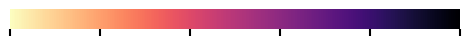

In [55]:
import matplotlib.colors as mcolors

vmin = 0
vmax = 1.0
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# color map
tick_labels = ['1/N'] + [f'{t:.1f}' for t in ticks[1:]]

cmap = plt.cm.magma_r
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(figsize=(5, 1))  
cbar = fig.colorbar(sm, cax=ax, orientation='horizontal')


cbar.set_ticks(ticks)

plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.tick_params(axis='x', which='major', size=5, width=1.5)


cbar.outline.set_visible(False)

plt.subplots_adjust(bottom=0.4, top=0.6, left=0.05, right=0.95)

plt.show()


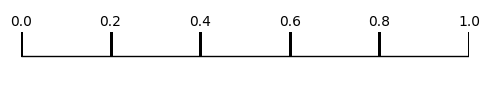

In [57]:
# xticks
fig, ax = plt.subplots(figsize=(5, 1))
ax.set_xlim(0, 1)
ax.set_ylim(-0.05, 0.1)

ax.hlines(0, 0, 1, color='black', linewidth=1)

ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
for t in ticks:
    ax.vlines(t, 0, 0.05, color='black', linewidth=1, antialiased=False)  
    ax.text(t, 0.06, f"{t:.1f}", ha='center', va='bottom', fontsize=10)   


ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
rule = 'unanimity'
methodes_ordered = ['random', 'clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum',
                 'KMcore_g1', 'KMcore_gf',
            'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'degree',
                'new_neiNodeSum_1_HNCsize']
for net in [1]:  # 1,2,5,9,11,12,19
    if net == 1:
        para = 1
        expr = 2
        with open(f'../SimulationResults/NamingGame/{rule}_{net}_para{para}_expr{expr}_nameRatios.json', 'r') as f:
            rlt = json.load(f)
    elif net in [2,5,9,11,12,19]:
        para = 1
        expr = 3
        with open(f'../SimulationResults/NamingGame/{rule}_{net}_para{para}_expr{expr}_nameRatios.json', 'r') as f:
            rlt = json.load(f)

    for mid, mtd in enumerate(methodes_ordered):
        heatMat[net][mtd] = np.zeros(heatMatSize['unanimity'][net])
        for i in range(1, heatMatSize['unanimity'][net][0]+1):
            for j in range(1, heatMatSize['unanimity'][net][1]+1):
                value = rlt[f'{rule}_n{net}_p{para}_e{expr}_betaID{j}_pID{i}_mtd{mtd}_range']
                heatMat[net][mtd][i-1][j-1] = statistics.median([_[0] for _ in value])
        rev_cmap = plt.cm.magma_r
        f, ax = plt.subplots(figsize=(3,4.5))
        sns.heatmap(heatMat[net][mtd], 
                    cmap=rev_cmap, vmin=1/nodeNumDic[net], vmax=1, cbar=False).invert_yaxis()  # annot=True, fmt='.2f', legend=False

        ax.set_xticks([0, 6, 12, 18, 24, 30])  
        ax.set_yticks(ylDic_ss[net])
        plt.tick_params(axis='y', labelsize=16) 
        plt.tick_params(axis='x', labelsize=16)
        plt.tick_params(axis='x', which='major', size=6, width=2) 
        plt.tick_params(axis='y', which='major', size=6, width=2)  

        # plt.savefig(f'savefig_si_ng/net{net}_mid{mid}_{mtd}_{rule}.svg', format='svg', bbox_inches='tight',dpi=300)
        print(net,mtd)
        plt.show()

union

In [13]:
methodes = ['degree', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
           'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'PageRank', 'random', 'neiNodesNum', 
            'new_neiNodeSum_1_HNCsize', 'new_neiNodeSum_1']
heatMatSize = {'union':{1:(50,30), 2:(22,30), 9:(27,30), 5:(31,30), 11:(17,30), 12:(7,30), 19:(50,30),}}
mctimes = 50
heatMat = {1:{}, 2:{}, 9:{}, 5:{}, 11:{}, 12:{}, 19:{}}
nodeNumDic = {1: 1718, 2: 1290, 3: 420, 4: 580, 5: 1104, 
              6: 294, 7: 282, 8: 143, 9: 979, 10: 339, 
              11: 591, 12: 217, 13: 76, 14: 242, 15: 403, 
              16: 327, 17: 663, 18: 130, 19: 1044, 20: 456}
ytDic = {1:np.linspace(0, heatMatSize['union'][1][0], 10), 2:np.linspace(0, heatMatSize['union'][2][0], 10),
         9: np.linspace(0, heatMatSize['union'][9][0], 10), 5:np.linspace(0, heatMatSize['union'][5][0], 10),
         11:np.linspace(0, heatMatSize['union'][11][0], 10), 12:np.linspace(0, heatMatSize['union'][12][0], 10),
         19:np.linspace(0, heatMatSize['union'][1][0], 10),}
ylDic_e = {1:[0.1*1e-2, 0.4*1e-2, 0.7*1e-2, 1.0*1e-2, 1.3*1e-2, 1.6*1e-2, 1.9*1e-2, 2.2*1e-2, 2.5*1e-2, 2.8*1e-2], 
         2:[0.1*1e-2, 0.4*1e-2, 0.7*1e-2, 1.0*1e-2, 1.3*1e-2, 1.6*1e-2, 1.9*1e-2, 2.2*1e-2, 2.5*1e-2, 2.8*1e-2],
         9: [0.1*1e-2, 0.4*1e-2, 0.7*1e-2, 1.0*1e-2, 1.3*1e-2, 1.6*1e-2, 1.9*1e-2, 2.2*1e-2, 2.5*1e-2, 2.8*1e-2], 
         5:[0.1*1e-2, 0.4*1e-2, 0.7*1e-2, 1.0*1e-2, 1.3*1e-2, 1.6*1e-2, 1.9*1e-2, 2.2*1e-2, 2.5*1e-2, 2.8*1e-2],
         11:[0.2*1e-2, 0.5*1e-2, 0.8*1e-2, 1.1*1e-2, 1.4*1e-2, 1.7*1e-2, 2.0*1e-2, 2.3*1e-2, 2.6*1e-2, 2.9*1e-2], 
         12:[0.5*1e-2, 0.8*1e-2, 1.1*1e-2, 1.4*1e-2, 1.7*1e-2, 2.0*1e-2, 2.3*1e-2, 2.6*1e-2, 2.9*1e-2, 3.2*1e-2],
         19:[0.1*1e-2, 0.4*1e-2, 0.7*1e-2, 1.0*1e-2, 1.3*1e-2, 1.6*1e-2, 1.9*1e-2, 2.2*1e-2, 2.5*1e-2, 2.8*1e-2],}
ylDic = {1:[0.1, 0.4, 0.7, 1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8], 
         2:[0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.8],
         9: [0.1, 0.4, 0.7, 1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8], 
         5:[0.1, 0.4, 0.7, 1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8],
         11:[0.2, 0.5, 0.8, 1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 8.8],  #
         12:[0.5, 0.8, 1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 9.4],
         19:[0.1, 0.4, 0.7, 1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8], }  #
ylDic_s = {1:[0.1, 0.7, 1.3, 1.9, 2.5, 2.8], 
         2:[0.1, 0.5, 0.9, 1.3, 1.7, 1.8],
         9: [0.1, 0.7, 1.3, 1.9, 2.5, 2.8], 
         5:[0.1, 0.7, 1.3, 1.9, 2.5, 2.8],
         11:[0.2, 0.8, 1.4, 2.0, 2.6, 2.9],  #
         12:[0.5, 1.1, 1.7, 2.3, 2.9, 3.2],
         19:[0.1, 0.7, 1.3, 1.9, 2.5, 2.8],}  #
y_b = {1:0.1,  2:0.1, 9: 0.1,  5:0.1, 11:0.2,  12:0.5, 19:0.1,}
y_e = {1:2.8,  2:1.8, 9: 2.8,  5:2.8, 11:2.9,  12:3.2, 19:2.8,}
ytnum=6

In [14]:
ylDic_ss = dict()
for n in [1,2,9,5,11,12,19]:
    ylDic_ss[n] = []
    for i in range(ytnum):
        ylDic_ss[n].append((ylDic_s[n][i]-y_b[n])/(y_e[n]-y_b[n])*heatMatSize['union'][n][0])

In [ ]:
rule = 'union'
methodes = ['random','new_neiNodeSum_1_HNCsize','degree', 'PageRank', 'new_neiNodeSum_1','neiNodesNum','KMcore_g1', 'KMcore_gf', 
            'clsKcore','clsCloseness', 'clsBetweenness',  'clsEigenvector', 
           'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max',  ]
for net in [1]:
    if net in [2,5,9,11,12,19]:
        para = 1
        expr = 3
        with open(f'../SimulationResults/NamingGame/{rule}_{net}_para{para}_expr{expr}_nameRatios.json', 'r') as f:
            rlt = json.load(f)
    elif net == 1:
        para = 1
        expr = 2
        with open(f'../SimulationResults/NamingGame/{rule}_{net}_para{para}_expr{expr}_nameRatios.json', 'r') as f:
            rlt = json.load(f)

    for mid, mtd in enumerate(methodes_ordered):
        heatMat[net][mtd] = np.zeros(heatMatSize['union'][net])
        for i in range(1, heatMatSize['union'][net][0]+1):
            for j in range(1, heatMatSize['union'][net][1]+1):
                value = rlt[f'{rule}_n{net}_p{para}_e{expr}_betaID{j}_pID{i}_mtd{mtd}_range']
                # heatMat[net][mtd][i-1][j-1] = sum([_[0] for _ in value])/len(value)
                heatMat[net][mtd][i-1][j-1] = statistics.median([_[0] for _ in value])
        rev_cmap = plt.cm.magma_r
        f, ax = plt.subplots(figsize=(3,4.5))
        sns.heatmap(heatMat[net][mtd], 
                    cmap=rev_cmap, vmin=1/nodeNumDic[net], vmax=1, cbar=False).invert_yaxis()  # annot=True, fmt='.2f', legend=False

        # plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        ax.set_xticks([0, 6, 12, 18, 24, 30]) 
        ax.set_yticks(ylDic_ss[net])
        plt.tick_params(axis='y', labelsize=16) 
        plt.tick_params(axis='x', labelsize=16)
        plt.tick_params(axis='x', which='major', size=6, width=2)  
        plt.tick_params(axis='y', which='major', size=6, width=2)  

        # plt.savefig(f'savefig_si_ng/net{net}_mid{mid}_{mtd}_{rule}.svg', format='svg', bbox_inches='tight',dpi=300)
        print(net,mtd)
        plt.show()